In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
#define a regression model with Keras 
from IPython.display import clear_output
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, Reshape, Conv1D, MaxPooling1D, UpSampling1D, Concatenate, Add
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History, Callback
import matplotlib.pyplot as plt

def extract_suffixes(folder_path, index):
    """ Extracts numeric suffixes from the filenames in the given folder. """
    data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    suffixes = set(int(f.split('_')[index].split('.')[0]) for f in data_files)
    return suffixes

def get_common_suffixes(folder1, folder2, index1, index2):
    """ Finds common numeric suffixes between two folders. """
    suffixes1 = extract_suffixes(folder1, index1)
    suffixes2 = extract_suffixes(folder2, index2)
    common_suffixes = suffixes1.intersection(suffixes2)
    return common_suffixes

def load_files(folder_path, common_suffixes, index, transpose=False):
    """ Loads files that have a suffix in the common suffix list. """
    data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    # Filter files by the common suffixes
    data_files = [f for f in data_files if int(f.split('_')[index].split('.')[0]) in common_suffixes]
    data_files.sort(key=lambda f: int(f.split('_')[index].split('.')[0]))
    
    reshaped_data_list = []
    for data_file in data_files:
        data_path = os.path.join(folder_path, data_file)
        data = np.loadtxt(data_path, delimiter=',', usecols=[2], skiprows=1)
        reshaped_data = data.reshape(128, 128)
        if transpose:
            reshaped_data = reshaped_data.T
        reshaped_data_list.append(reshaped_data)

    return np.array(reshaped_data_list)

# # Example usage:
# folder1 = "path_to_folder1"
# folder2 = "path_to_folder2"
index1 = -1  # Suffix is the last element before '.txt' like "Shape_{number}.txt"
index2 = -2  # Suffix is the second last element in filenames like "Surface_{number}_truth.txt"

# common_suffixes = get_common_suffixes(folder1, folder2, index1, index2)
# data1 = load_files(folder1, common_suffixes, index1)
# data2 = load_files(folder2, common_suffixes, index2)


# Paths to your input and output image folders
folder_path_input = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Input_images/'
folder_path_output1 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/1st/'
folder_path_output2 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/2nd/'
folder_path_output6 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/3rd/'
folder_path_output4 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/4th/'
folder_path_output5 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/5th/'
folder_path_output3 = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/Truth_files/6th/'

common_suffixes = get_common_suffixes(folder_path_input, folder_path_output1, index1, index2)

# Load and process images
input_images = load_files(folder_path_input, common_suffixes, index1, transpose=True)
output_images1 = load_files(folder_path_output1, common_suffixes, index2)
output_images2 = load_files(folder_path_output2, common_suffixes, index2)
output_images3 = load_files(folder_path_output3, common_suffixes, index2)
output_images4 = load_files(folder_path_output4, common_suffixes, index2)
output_images5 = load_files(folder_path_output5, common_suffixes, index2)
output_images6 = load_files(folder_path_output6, common_suffixes, index2)

# Reshape to add the channel dimension for input images
input_images = input_images.reshape(input_images.shape[0], 128, 128, 1)
output_images1 = output_images1.reshape(output_images1.shape[0], 128, 128, 1)
output_images2 = output_images2.reshape(output_images2.shape[0], 128, 128, 1)
output_images3 = output_images3.reshape(output_images3.shape[0], 128, 128, 1)
output_images4 = output_images4.reshape(output_images4.shape[0], 128, 128, 1)
output_images5 = output_images5.reshape(output_images5.shape[0], 128, 128, 1)
output_images6 = output_images6.reshape(output_images6.shape[0], 128, 128, 1)

print(output_images1.shape)
print(output_images2.shape)
print(output_images3.shape)
print(output_images4.shape)
print(output_images5.shape)
print(output_images6.shape)
print(input_images.shape)


(4861, 128, 128, 1)
(4861, 128, 128, 1)
(4861, 128, 128, 1)
(4861, 128, 128, 1)
(4861, 128, 128, 1)
(4861, 128, 128, 1)
(4861, 128, 128, 1)


In [2]:
# from PIL import Image
# import numpy as np
# import pandas as pd
# import os
# #define a regression model with Keras 
# from IPython.display import clear_output
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, Reshape, Conv1D, MaxPooling1D, UpSampling1D, Concatenate, Add
# from tensorflow.keras import backend as K
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import History, Callback
# import matplotlib.pyplot as plt



# # Function to load data from .txt files
# def load_files1(folder_path):
#      data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
#      # Sort files by the numeric suffix in the filename
#      data_files.sort(key=lambda f: int(f.split('_')[-1].split('.')[0]))
#      reshaped_data_list = []  # Initialize an empty list to store reshaped data arrays
#      for data_file in data_files:
#          data_path = os.path.join(folder_path, data_file)
#          data = np.loadtxt(data_path, delimiter=',', usecols=[2], skiprows=1)
#          reshaped_data = data.reshape(128, 128)
#          reshaped_data_list.append(reshaped_data)
        
#      return np.array(reshaped_data_list)

# # Function to load data from .txt files
# def load_files2(folder_path):
#      data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
#      # Sort files by the numeric suffix in the filename
#      data_files.sort(key=lambda f: int(f.split('_')[-2])) #The split('_')[-2] part splits the filename by underscores and selects the second last element, which should be the numeric part in the filename format "Surface_{number}_truth.txt".
#      reshaped_data_list = []  # Initialize an empty list to store reshaped data arrays
#      for data_file in data_files:
#          data_path = os.path.join(folder_path, data_file)
#          data = np.loadtxt(data_path, delimiter=',', usecols=[2], skiprows=1)
#          reshaped_data = (data.reshape(128, 128)).T
#          reshaped_data_list.append(reshaped_data)
        
#      return np.array(reshaped_data_list)


# # Paths to your input and output image folders
# folder_path_input = '/home/xuj/unet/UNET_modePrediction/Data_Store_20umStructure/Input/'
# folder_path_output1 = '/home/xuj/unet/UNET_modePrediction/Data_Store_20umStructure/Truth_output_target/Truth_files/1st/'
# folder_path_output2 = '/home/xuj/unet/UNET_modePrediction/Data_Store_20umStructure/Truth_output_target/Truth_files/2nd/'
# folder_path_output3 = '/home/xuj/unet/UNET_modePrediction/Data_Store_20umStructure/Truth_output_target/Truth_files/3rd/'
# folder_path_output3 = '/home/xuj/unet/UNET_modePrediction/Data_Store_20umStructure/Truth_output_target/Truth_files/4th/'

# # Load and process images
# input_images = load_files1(folder_path_input)
# output_images1 = load_files2(folder_path_output1)
# output_images2 = load_files2(folder_path_output2)
# output_images3 = load_files2(folder_path_output3)
# output_images4 = load_files2(folder_path_output4)

# # Reshape to add the channel dimension for input images
# input_images = input_images.reshape(input_images.shape[0], 128, 128, 1)
# output_images1 = output_images1.reshape(output_images1.shape[0], 128, 128, 1)
# output_images2 = output_images2.reshape(output_images2.shape[0], 128, 128, 1)
# output_images3 = output_images3.reshape(output_images3.shape[0], 128, 128, 1)
# output_images4 = output_images4.reshape(output_images4.shape[0], 128, 128, 1)


In [3]:
# Replace 'path/to/your/file.txt' with the actual k_squared file path
file_path = '/home/xuj/unet/UNET_modePrediction/Data_Store/Polygons_bansed_on_random_curves/Truth/k_squared_files/Kfile_combination/results_for_1.txt'

k_squared_array = np.genfromtxt(file_path, usecols=(2), delimiter=',', skip_header=1)
k_squared_array = k_squared_array.reshape(-1, 1)

In [4]:
# Given the physical size of the area and the resolution of your images, calculate the size of a pixel:
# Will be used in the phys loss definition

real_width = 500e-6  # meters, grid_limit *2 from TrainingDataset_truth
pixels_width = 128  # pixels
pixel_size_value = real_width / pixels_width  # meters per pixel

In [5]:
# Normalize the arrays
# Calculate the maximum value for each image individually
# The axis parameter (1, 2) means we find the max over the height and width of each image
# keepdims=True keeps the reduced dimensions so the shape remains compatible for broadcasting

normalized_input_images = np.array(input_images).astype(np.float32) 
individual_peak_values = 4.0e-10
# individual_peak_values1 = np.max(np.abs(output_images1), axis=(1, 2), keepdims=True).astype(np.float32) 
normalized_output_images1 = np.array(output_images1).astype(np.float32) / individual_peak_values
# individual_peak_values2 = np.max(np.abs(output_images2), axis=(1, 2), keepdims=True).astype(np.float32) 
normalized_output_images2 = np.array(output_images2).astype(np.float32) / individual_peak_values
# individual_peak_values3 = np.max(np.abs(output_images3), axis=(1, 2), keepdims=True).astype(np.float32) 
normalized_output_images3 = np.array(output_images3).astype(np.float32) / individual_peak_values
# individual_peak_values4 = np.max(np.abs(output_images4), axis=(1, 2), keepdims=True).astype(np.float32) 
normalized_output_images4 = np.array(output_images4).astype(np.float32) / individual_peak_values
normalized_output_images5 = np.array(output_images5).astype(np.float32) / individual_peak_values
normalized_output_images6 = np.array(output_images6).astype(np.float32) / individual_peak_values

In [6]:
from sklearn.model_selection import train_test_split

# Split the images and k_squared values into training and testing & validation sets
# Assuming normalized_input_images, normalized_output_images, and k_squared_array are already defined
test_size=0.4
random_state=42
# for input and k_squared
input_train, input_test, k_squared_train, k_squared_test = train_test_split(
    normalized_input_images, k_squared_array, test_size=test_size, random_state=random_state
)
# for output images
output_train1, output_test1, output_train2, output_test2, output_train3, output_test3, output_train4, output_test4, output_train5, output_test5, output_train6, output_test6 = train_test_split(
    normalized_output_images1, normalized_output_images2, normalized_output_images3, normalized_output_images4, normalized_output_images5, normalized_output_images6, test_size=test_size, random_state=random_state
)


# Split the images and k_squared values into validation and testing sets
test_size=0.5
random_state=42
# for input and k_squared
input_val, input_test_test, k_squared_val, k_squared_test_test = train_test_split(
    input_test, k_squared_test, test_size=0.5, random_state=42
)
# for output images
output_val1, output_test_test1, output_val2, output_test_test2, output_val3, output_test_test3, output_val4, output_test_test4, output_val5, output_test_test5, output_val6, output_test_test6 = train_test_split(
    output_test1, output_test2, output_test3, output_test4, output_test5, output_test6, test_size=test_size, random_state=random_state
)


In [7]:

# # Assuming k_squared has shape [batch_size, 1] and y_pred_real_disp has shape [batch_size, height, width, channels]
# # Example of broadcasting k_squared to match y_pred_real_disp
# k_squared_expanded = tf.expand_dims(tf.expand_dims(k_squared_train, -1), -1)  # Now [batch_size, 1, 1, 1]
# k_squared_train = tf.broadcast_to(k_squared_expanded, tf.shape(output_train))  # Match input_images shape
k_squared_train = tf.cast(k_squared_train, tf.float32)
k_squared_val = tf.cast(k_squared_val, tf.float32)

k_squared_expanded = tf.expand_dims(tf.expand_dims(k_squared_train, -1), -1)  # Now [batch_size, 1, 1, 1]
k_squared_train = tf.broadcast_to(k_squared_expanded, tf.shape(input_train)) # Match input_images shape

k_squared_expanded = tf.expand_dims(tf.expand_dims(k_squared_val, -1), -1)  # Now [batch_size, 1, 1, 1]
k_squared_val = tf.broadcast_to(k_squared_expanded, tf.shape(input_val)) # Match input_images shape

2024-07-02 10:52:38.119476: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 10:52:38.385352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38367 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0


K:
K_Shape: (2916, 128, 128, 1)
K_Data Type: <dtype: 'float32'>
Input Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


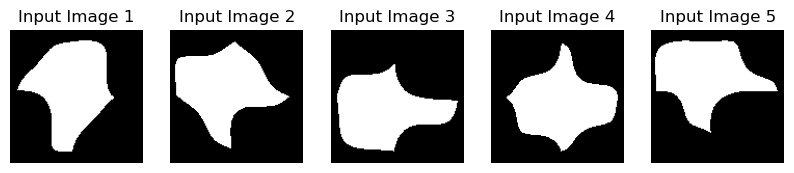


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


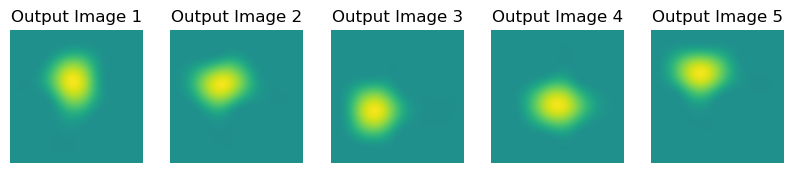


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


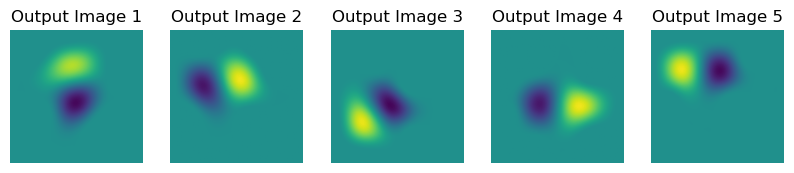


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


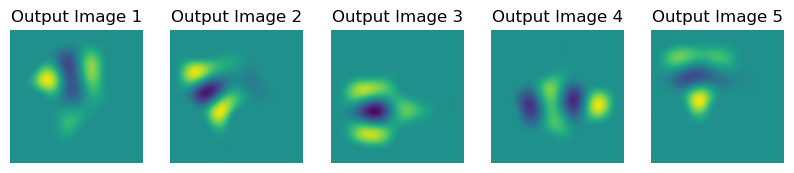


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


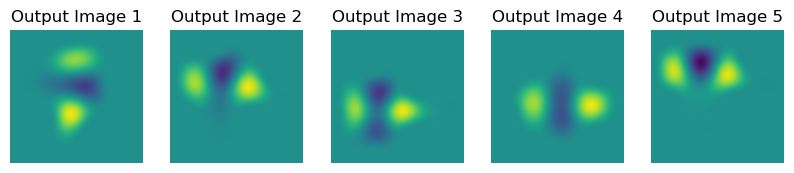


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


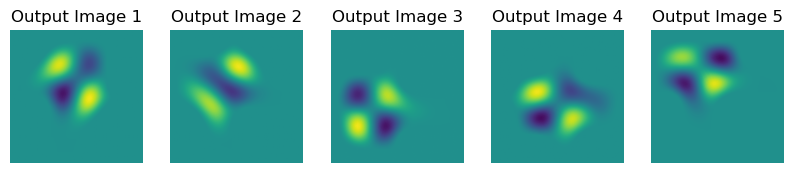


Output Images:
Shape: (2916, 128, 128, 1)
Data Type: float32


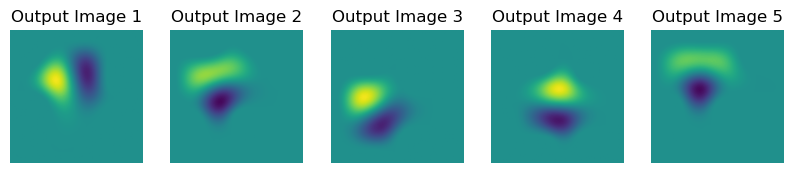

In [8]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, title, is_binary):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(5, 5, i + 1)
        if is_binary:
            plt.imshow(images[i], cmap='gray')
            plt.title(f"{title} {i+1}")
        else:
            plt.imshow(images[i], vmin=-1, vmax=1)
            plt.title(f"{title} {i+1}")
        plt.axis("off")
    plt.show()

# check the k_squared shape
print("K:")
print("K_Shape:", k_squared_train.shape)
print("K_Data Type:", k_squared_train.dtype)
first_element = k_squared_train[0]
#print(first_element)

# Check and display input images
print("Input Images:")
print("Shape:", input_train.shape)
print("Data Type:", input_train.dtype)
display_images(input_train, "Input Image", is_binary=True)

# Check and display output images
print("\nOutput Images:")
print("Shape:", output_train1.shape)
print("Data Type:", output_train1.dtype)
display_images(output_train1, "Output Image", is_binary=False)
#print(normalized_output_images[0])

print("\nOutput Images:")
print("Shape:", output_train2.shape)
print("Data Type:", output_train2.dtype)
display_images(output_train2, "Output Image", is_binary=False)

print("\nOutput Images:")
print("Shape:", output_train3.shape)
print("Data Type:", output_train3.dtype)
display_images(output_train3, "Output Image", is_binary=False)

print("\nOutput Images:")
print("Shape:", output_train4.shape)
print("Data Type:", output_train4.dtype)
display_images(output_train4, "Output Image", is_binary=False)

print("\nOutput Images:")
print("Shape:", output_train5.shape)
print("Data Type:", output_train5.dtype)
display_images(output_train5, "Output Image", is_binary=False)

print("\nOutput Images:")
print("Shape:", output_train6.shape)
print("Data Type:", output_train6.dtype)
display_images(output_train6, "Output Image", is_binary=False)

In [9]:
from tensorflow.keras.layers import Multiply, Activation, BatchNormalization
from tensorflow.keras.layers import Reshape, Lambda
from tensorflow.keras.layers import LeakyReLU

def attention_gate(input_tensor, gating_tensor, inter_channels):
    # Attention mechanism to refine the skip connections
    gating_resized = Conv2D(inter_channels, (1, 1), padding='same')(gating_tensor)
    gating_resized = LeakyReLU(alpha=0.01)(gating_resized)
    input_resized = Conv2D(inter_channels, (1, 1), padding='same')(input_tensor)
    input_resized = LeakyReLU(alpha=0.01)(input_resized)

    combined = Add()([input_resized, gating_resized])
    combined = LeakyReLU(alpha=0.01)(combined)
    attention_weights = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(combined)
    output = Multiply()([input_tensor, attention_weights])
    return output

def decoder_block_with_attention(up_input, skip_input, num_filters):
    upsampled = UpSampling2D((2, 2))(up_input)
    attention_applied = attention_gate(skip_input, upsampled, num_filters // 2)
    concat = Concatenate()([upsampled, attention_applied])
    conv = conv_block(concat, num_filters)
    return conv

def conv_block(x, num_filters):
    x_res = x  
    x = Conv2D(num_filters, (5, 5), padding='same')(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = BatchNormalization()(x)
    x = Conv2D(num_filters, (5, 5), padding='same')(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = BatchNormalization()(x)
    x_res = Conv2D(num_filters, (1, 1), padding='same')(x_res)
    x = Add()([x, x_res])
    return x

# Main model input
input_img = Input(shape=(128, 128, 1), name='input_image')

# # Additional input for k_squared
input_k_squared = Input(shape=(1,), name='k_squared')
# # Additional input for output_images1
output_images1 = Input(shape=(1,), name='output_images1')
# # Additional input for output_images2
output_images2 = Input(shape=(1,), name='output_images2')
# # Additional input for output_images1
output_images3 = Input(shape=(1,), name='output_images3')
output_images4 = Input(shape=(1,), name='output_images4')
output_images5 = Input(shape=(1,), name='output_images5')

# Encoder
c1 = conv_block(input_img, 32)
p1 = MaxPooling2D((2, 2), padding='same')(c1)
c2 = conv_block(p1, 64)
p2 = MaxPooling2D((2, 2), padding='same')(c2)
c3 = conv_block(p2, 128)
p3 = MaxPooling2D((2, 2), padding='same')(c3)

# Bottleneck
c5 = conv_block(p3, 256)

# Decoder with Attention Gates
c7 = decoder_block_with_attention(c5, c3, 128)
c8 = decoder_block_with_attention(c7, c2, 64)
c9 = decoder_block_with_attention(c8, c1, 32)

# Output
output = Conv2D(1, (1, 1), activation = 'tanh', padding='same')(c9)

# Model definition now includes input_k_squared
regression = Model(inputs=[input_img, input_k_squared, output_images1, output_images2, output_images3, output_images4, output_images5], outputs=output)


In [10]:

def compute_laplacian(x, pixel_size):
    # Define the Laplacian kernel considering the pixel size
    laplacian_kernel = tf.constant([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]], dtype=tf.float32) / (pixel_size ** 2)
    laplacian_kernel = laplacian_kernel[:, :, tf.newaxis, tf.newaxis]  # Shape for conv2d
    return tf.nn.conv2d(x, laplacian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def symmetric_loss_2d(y_true, y_pred):
    # 二维数据的均方误差计算，保留维度用于后续处理
    loss_positive = tf.keras.losses.mean_squared_error(y_true, y_pred)
    loss_negative = tf.keras.losses.mean_squared_error(-y_true, y_pred)
    # # Encourage balance in positive and negative predictions
    balance_penalty = tf.abs(tf.reduce_mean(y_pred))  # Penalizes predictions skewing too positive/negative
    # 取较小的损失 and combine penalty
    symmetric_loss = tf.minimum(loss_positive, loss_negative) + balance_penalty
    
    return symmetric_loss

def helmholtz_loss(y_true, y_pred, k_squared, pixel_size, real_disp_multiplier=4.0e-10):
    # Normalize and apply real displacement multiplier
    y_pred_real_disp = y_pred * real_disp_multiplier
    y_true_real_disp = y_true * real_disp_multiplier
    
    # Compute the maximum displacement per image in y_true_real_disp
    max_displacement_per_image = tf.reduce_max(tf.abs(y_true_real_disp), axis=[1, 2], keepdims=True)
    
    # Criterion: displacements greater than 1% of the max displacement per image
    criterion = 0.05 * max_displacement_per_image
    
    # Generate a boolean mask where displacement exceeds the criterion in y_true_real_disp
    significant_displacement_mask = tf.abs(y_true_real_disp) > criterion
    
    # Apply the mask to y_pred_real_disp. Since we need to perform element-wise multiplication,
    # and both tensors have the same shape, we can directly multiply them.
    # However, the mask is boolean, and y_pred_real_disp is likely float, so cast the mask to float.
    significant_y_pred_real_disp = y_pred_real_disp * tf.cast(significant_displacement_mask, y_pred_real_disp.dtype)
    
    # Assuming you want to calculate the loss on significant_y_pred_real_disp now:
    # Calculate Helmholtz residue for significant areas
    significant_helmholtz_residue = compute_laplacian(tf.abs(significant_y_pred_real_disp), pixel_size) + k_squared * tf.abs(significant_y_pred_real_disp)
    significant_helmholtz_residue = abs(significant_helmholtz_residue)

    # Compute the mean squared loss for significant areas
    return tf.reduce_mean(tf.square(significant_helmholtz_residue))


def k_squared_deviation_loss(y_true, y_pred, pixel_size, real_disp_multiplier=4.0e-10):
    # Normalize and apply real displacement multiplier
    y_pred_real_disp = y_pred * real_disp_multiplier
    y_true_real_disp = y_true * real_disp_multiplier
  
    # Compute the maximum displacement per image in y_true_real_disp
    max_displacement_per_image = tf.reduce_max(tf.abs(y_true_real_disp), axis=[1, 2], keepdims=True)
    
    #print(max_displacement_per_image)
    # Criterion: displacements greater than 5% of the max displacement per image
    criterion = 0.05 * max_displacement_per_image
    #criterion = 0.05 
    #print(criterion)
    #print(tf.abs(y_true_real_disp))
    # Generate a boolean mask where displacement exceeds the criterion in y_true_real_disp
    significant_displacement_mask = tf.abs(y_true_real_disp) > criterion
    
    # Apply the mask to y_pred_real_disp. Since we need to perform element-wise multiplication,
    # and both tensors have the same shape, we can directly multiply them.
    # However, the mask is boolean, and y_pred_real_disp is likely float, so cast the mask to float.
    significant_y_pred_real_disp = y_pred_real_disp * tf.cast(significant_displacement_mask, y_pred_real_disp.dtype)
    
    # k-squared matrix in significant area
    epsilon = 1e-12
    theoretical_k_squared = -compute_laplacian(tf.abs(significant_y_pred_real_disp), pixel_size) / (tf.abs(significant_y_pred_real_disp) + epsilon)

    # Compute the loss from the direviation in k-squared matrix
    return tf.math.reduce_std(theoretical_k_squared)
    
def orthogonality_loss(y_pred, output_images1, output_images2, output_images3, output_images4, output_images5):
    # y_pred = tf.cast(y_pred, tf.float32)
    # output_images1 = tf.cast(output_images1, tf.float32)
    # output_images2 = tf.cast(output_images2, tf.float32)
    # output_images3 = tf.cast(output_images3, tf.float32)
    # Compute the absolute dot product and sum over all dimensions to get a scalar
    dot_product_positive = tf.reduce_mean(tf.abs(tf.reduce_sum(y_pred * output_images1, axis=[1, 2, 3], keepdims=True))) + \
                  tf.reduce_mean(tf.abs(tf.reduce_sum(y_pred * output_images2, axis=[1, 2, 3], keepdims=True))) + \
                  tf.reduce_mean(tf.abs(tf.reduce_sum(y_pred * output_images3, axis=[1, 2, 3], keepdims=True))) + \
                  tf.reduce_mean(tf.abs(tf.reduce_sum(y_pred * output_images4, axis=[1, 2, 3], keepdims=True))) + \
                  tf.reduce_mean(tf.abs(tf.reduce_sum(y_pred * output_images5, axis=[1, 2, 3], keepdims=True)))
    # dot_product_negative = tf.reduce_mean(tf.abs(tf.reduce_sum(-y_pred * output_images1, axis=[1, 2, 3], keepdims=True))) + \
    #               tf.reduce_mean(tf.abs(tf.reduce_sum(-y_pred * output_images2, axis=[1, 2, 3], keepdims=True))) + \
    #               tf.reduce_mean(tf.abs(tf.reduce_sum(-y_pred * output_images3, axis=[1, 2, 3], keepdims=True)))    
    # dot_product_loss = tf.minimum(dot_product_positive, dot_product_negative)
    # print("y_pred shape:", y_pred.shape)
    # print("output_images1:", output_images1.shape)
    # print("output_images2:", output_images2.shape)
    # print("output_images3:", output_images3.shape)
    return dot_product_positive


class CustomHelmholtzLoss(tf.keras.losses.Loss):
    def __init__(self, pixel_size_value, name="custom_helmholtz_loss"):
        super().__init__(name=name)
        self.pixel_size_value = pixel_size_value
        self.k_squared = None  # Initialize k_squared as an attribute
        self.output_images1 = None  # Initialize output_images1 as an attribute
        self.output_images2 = None  # Initialize output_images2 as an attribute
        self.output_images3 = None  # Initialize output_images3 as an attribute
        self.current_epoch = 0  # Initialize current epoch counter
        
    def set_k_squared(self, k_squared):
        self.k_squared = k_squared

    def set_output_images1(self, output_images1):
        self.output_images1 = output_images1

    def set_output_images2(self, output_images2):
        self.output_images2 = output_images2

    def set_output_images3(self, output_images3):
        self.output_images3 = output_images3

    def set_output_images4(self, output_images4):
        self.output_images4 = output_images4

    def set_output_images5(self, output_images5):
        self.output_images5 = output_images5
    
    def set_current_epoch(self, epoch):
        """Update the current epoch."""
        self.current_epoch = epoch
    
    def call(self, y_true, y_pred):
        """Calculate the loss."""
        if self.k_squared is None:
            raise ValueError("k_squared is not set. Please set k_squared using the set_k_squared method.")

        mse_loss1 = tf.keras.losses.mean_squared_error(y_true, y_pred)
        mse_loss2 = tf.keras.losses.mean_squared_error(tf.abs(y_true), tf.abs(y_pred))
        phys_loss1 = helmholtz_loss(y_true, y_pred, self.k_squared, self.pixel_size_value)
        phys_loss2 = k_squared_deviation_loss(y_true, y_pred, self.pixel_size_value)
        phys_loss3 = symmetric_loss_2d(y_true, y_pred)
        phys_loss4 = orthogonality_loss(y_pred, self.output_images1, self.output_images2, self.output_images3, self.output_images4, self.output_images5)
        # Apply phys_losses conditionally based on the current epoch
        # if self.current_epoch < 50 :
        #     gamma  = 1
        #     belta1 = 0
        #     belta2 = 0
        #     alpha1 = 0
        #     alpha2 = 0
        #     # total_loss = belta1 * mse_loss1
        #     total_loss = gamma * phys_loss3
        #     # print("phys_loss1 shape:", phys_loss1.shape)
        #     # print("phys_loss2 shape:", phys_loss2.shape)
        #     # print("phys_loss3 shape:", phys_loss3.shape)
        #     # print("phys_loss4 shape:", phys_loss4.shape)
        # Apply phys_losses conditionally based on the current epoch
        if self.current_epoch < 50 :
            gamma  = 0
            belta1 = 1
            belta2 = 0
            alpha1 = 0
            alpha2 = 0
            total_loss = belta1 * mse_loss1
        elif 50 <=  self.current_epoch < 100 :
            gamma  = 0
            belta1 = 1
            belta2 = 0
            alpha1 = 0
            alpha2 = 0
            total_loss = belta1 * mse_loss1
        elif 100 <=  self.current_epoch < 150 :
            gamma  = 1
            belta1 = 0
            belta2 = 0
            alpha1 = 5e-3
            alpha2 = 2e-15
            alpha3 = 3e-5
            total_loss = gamma * phys_loss3 + alpha1 * phys_loss1 + alpha2 * phys_loss2 + alpha3 * phys_loss4
            print(alpha1 * phys_loss1)
        elif 150 <= self.current_epoch < 400 :
            gamma  = 1
            belta1 = 0
            belta2 = 0
            alpha1 = 5e-3
            alpha2 = 2e-15
            alpha3 = 3e-5
            total_loss = gamma * phys_loss3 + alpha1 * phys_loss1 + alpha2 * phys_loss2 + alpha3 * phys_loss4
            print(alpha2 * phys_loss2)
        else :
            gamma  = 1
            belta1 = 0
            belta2 = 0
            alpha1 = 0
            alpha2 = 0
            total_loss = gamma * phys_loss3
        return total_loss



In [11]:
regression.compile(optimizer='adam',
              loss='mean_squared_error',  # Or your custom loss function
              metrics=['accuracy'])  # Optional, based on your needs

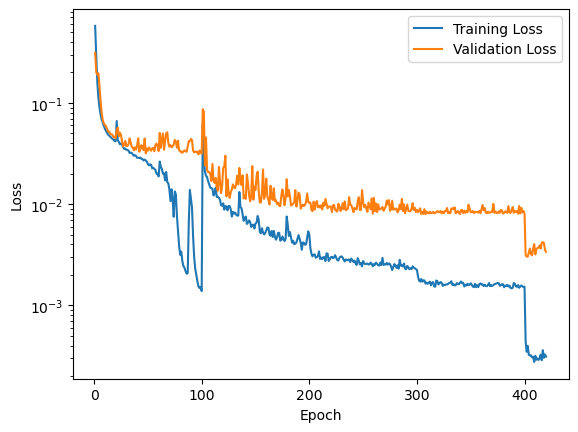

Epoch 420/420, Loss: 0.0003, Val Loss: 0.0034


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Assuming 'regression' is your model and 'loss_fn' is your loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# Define the loss function outside since it doesn't change per batch/epoch
loss_fn = CustomHelmholtzLoss(pixel_size_value=pixel_size_value)
# Prepare your dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((input_train, k_squared_train, output_train1, output_train2, output_train3, output_train4, output_train5, output_train6)).shuffle(buffer_size=len(input_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((input_val, k_squared_val, output_val1, output_val2, output_val3, output_val4, output_val5, output_val6)).batch(32)


# Learning rate scheduler function
def lr_scheduler(epoch, initial_lr=1e-5):
    if epoch < 20:
        # Keep the initial learning rate for the first 20 epochs
        return initial_lr
    elif 20 <= epoch < 40:
        # Gradually increase the learning rate
        return initial_lr*0.5e1
    elif 40 <= epoch < 60:
        # Gradually increase the learning rate
        return initial_lr *0.5e1  
    elif 60 <= epoch < 80:
        # Gradually increase the learning rate
        return initial_lr *1e1 
    elif 80 <= epoch < 100:
        # Gradually increase the learning rate
        return initial_lr *1e1 

    
    elif 100 <= epoch < 200:
        # initiate the learning rate
        return initial_lr *0.8e1
    elif 200 <= epoch < 300:
        # initiate the learning rate
        return initial_lr *0.5e1 
    elif 300 <= epoch < 400:
        # initiate the learning rate
        return initial_lr *0.2e1 
    # elif 120 <= epoch < 140:
    #     # Gradually increase the learning rate
    #     return initial_lr *1e1
    # elif 140 <= epoch < 160:
    #     # Gradually increase the learning rate
    #     return initial_lr *1e1
    # elif 160 <= epoch < 180:
    #     # Gradually increase the learning rate
    #     return initial_lr *2e1 
    # elif 180 <= epoch < 200:
    #     # Gradually increase the learning rate
    #     return initial_lr *2e1 
   
    else:
        return initial_lr 


# Plotting helper class
class PlotLosses:
    def __init__(self):
        self.epochs = []
        self.losses = []
        self.val_losses = []

    def update(self, epoch, loss, val_loss):
        self.epochs.append(epoch)
        self.losses.append(loss)
        self.val_losses.append(val_loss)
        self.plot()

    def plot(self):
        clear_output(wait=True)
        plt.plot(self.epochs, self.losses, label="Training Loss")
        plt.plot(self.epochs, self.val_losses, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.yscale('log')  # Set the y-axis to a logarithmic scale
        plt.legend()
        plt.show()

plot_losses = PlotLosses()

epochs = 420

for epoch in range(epochs):
    # Update the current epoch for the loss function
    loss_fn.set_current_epoch(epoch)
    
    # Update learning rate
    new_lr = lr_scheduler(epoch)
    optimizer.learning_rate.assign(new_lr)
    
    # Training loop
    total_loss = 0
    num_batches = 0
    for img_batch, k_squared_batch, output_images1_batch, output_images2_batch, output_images3_batch, output_images4_batch, output_images5_batch, target_batch in train_dataset:
        with tf.GradientTape() as tape:
            predictions = regression([img_batch, k_squared_batch, output_images1_batch, output_images2_batch, output_images3_batch, output_images4_batch, output_images5_batch], training=True)
            loss_fn.set_k_squared(k_squared_batch)  # Set k_squared for the loss function
            loss_fn.set_output_images1(output_images1_batch)
            loss_fn.set_output_images2(output_images2_batch) 
            loss_fn.set_output_images3(output_images3_batch) 
            loss_fn.set_output_images4(output_images4_batch) 
            loss_fn.set_output_images5(output_images5_batch) 
            loss = loss_fn(target_batch, predictions)
        gradients = tape.gradient(loss, regression.trainable_variables)
        optimizer.apply_gradients(zip(gradients, regression.trainable_variables))
        
        total_loss += loss.numpy()
        num_batches += 1
        print("num_batches:", num_batches)
    epoch_loss = total_loss / num_batches

    # Validation loop
    total_val_loss = 0
    num_val_batches = 0
    for img_batch, k_squared_batch, output_images1_batch, output_images2_batch, output_images3_batch, output_images4_batch, output_images5_batch, target_batch in val_dataset:
        predictions = regression([img_batch, k_squared_batch, output_images1_batch, output_images2_batch, output_images3_batch, output_images4_batch, output_images5_batch],  training=False)
        loss_fn.set_k_squared(k_squared_batch)  # Set k_squared for the loss function
        loss_fn.set_output_images1(output_images1_batch)
        loss_fn.set_output_images2(output_images2_batch) 
        loss_fn.set_output_images3(output_images3_batch)
        loss_fn.set_output_images4(output_images4_batch) 
        loss_fn.set_output_images5(output_images5_batch)
        
        val_loss = loss_fn(target_batch, predictions)
        
        total_val_loss += val_loss.numpy()
        num_val_batches += 1
        print("num_val_batches:", num_val_batches)
    epoch_val_loss = total_val_loss / num_val_batches

    # Update plot
    plot_losses.update(epoch + 1, epoch_loss, epoch_val_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")



In [13]:
#save and load the trained model

regression.save('regression_3phys_3rd_orth6modes.h5')

In [14]:
#get the predictions for the test dataset
output_prediction = regression.predict([input_test_test,k_squared_test_test, output_test_test1, output_test_test2, output_test_test3, output_test_test4, output_test_test5])

Comparison of First 3 Input, Prediction, and Truth Images:


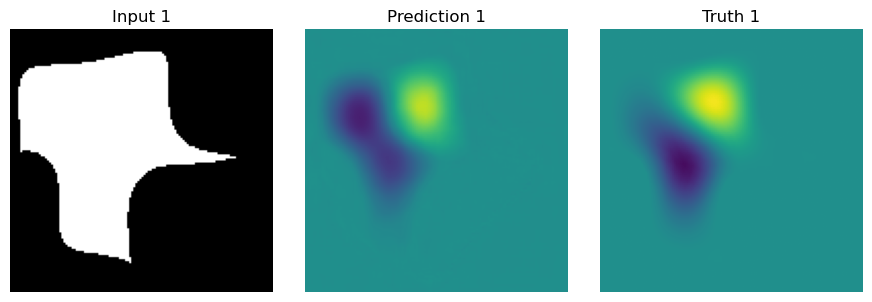

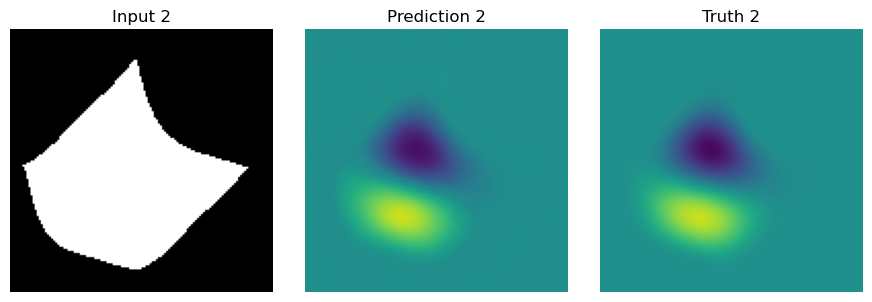

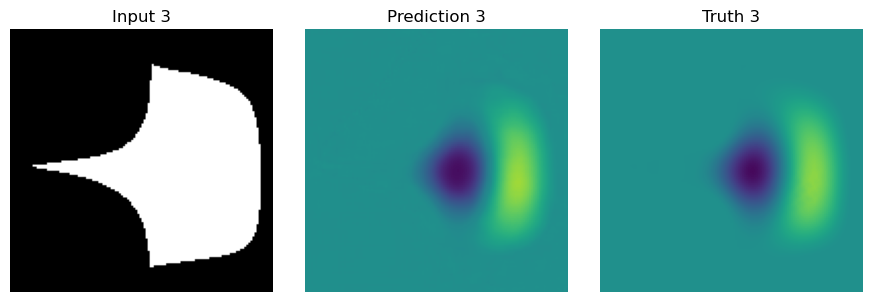

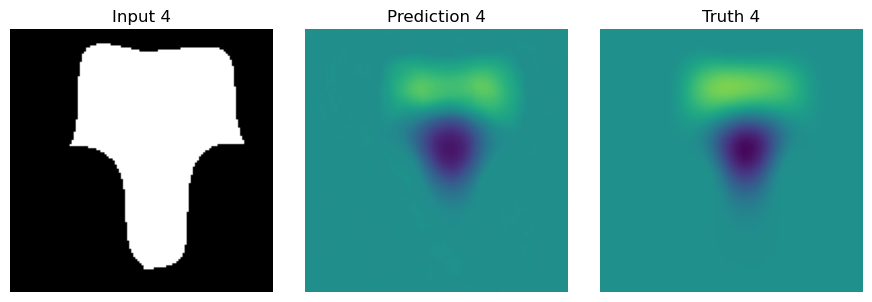

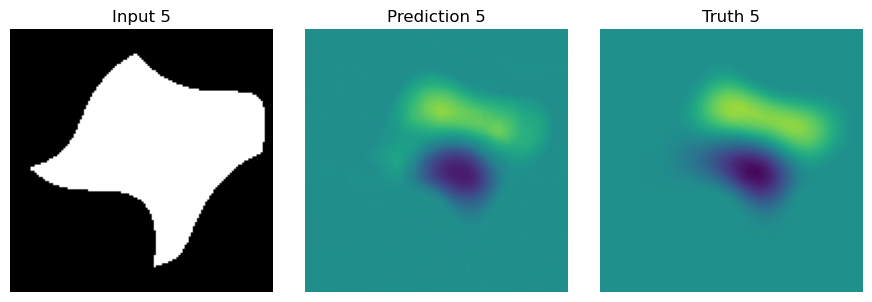

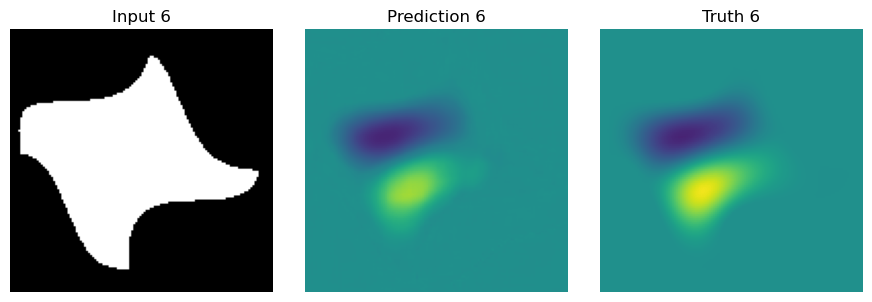

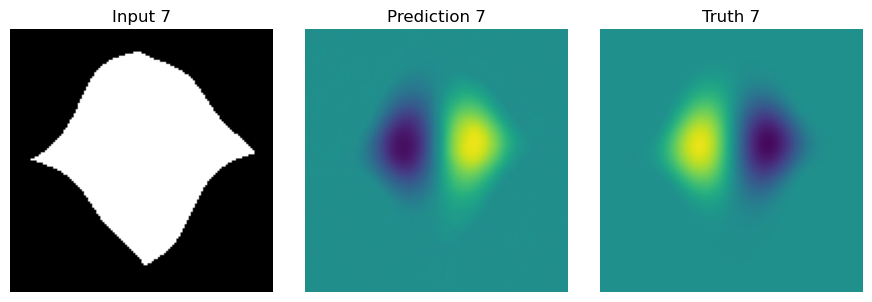

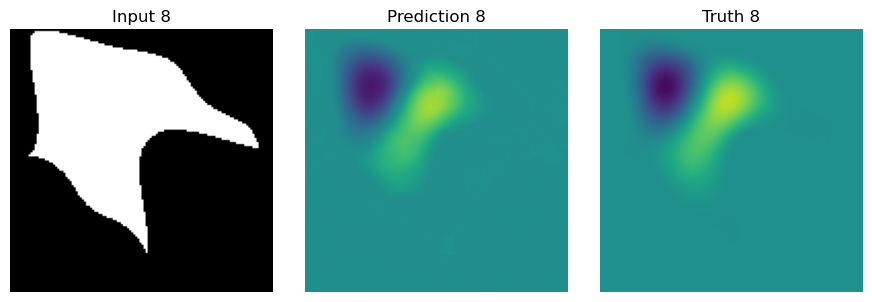

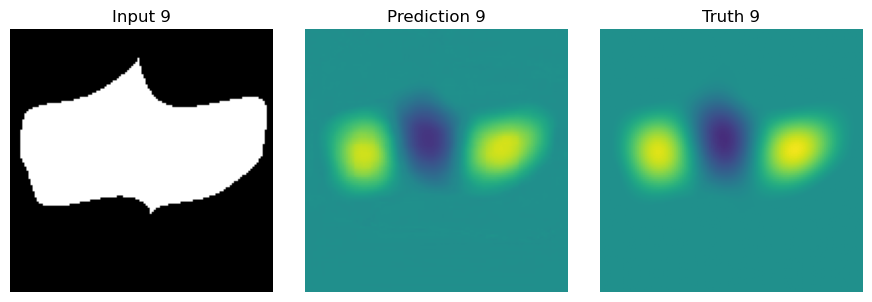

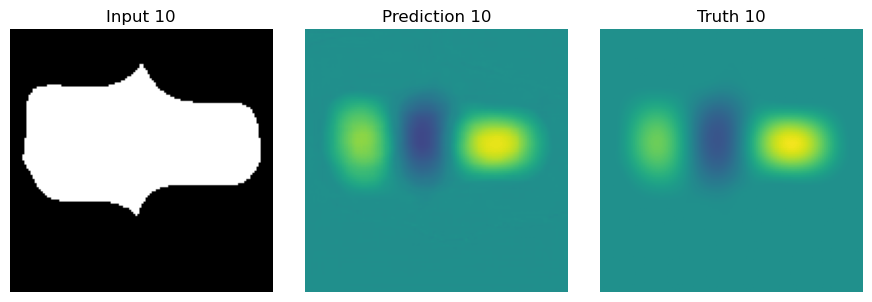

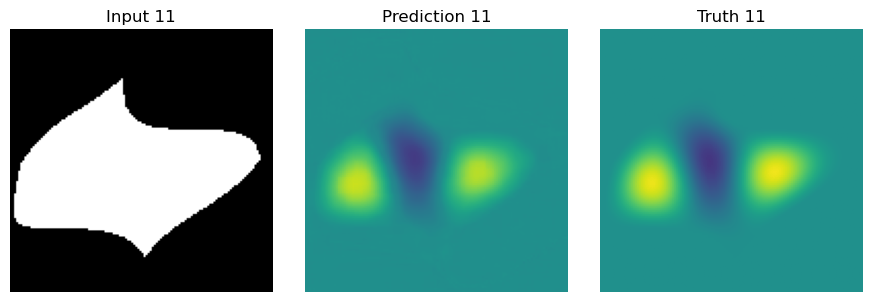

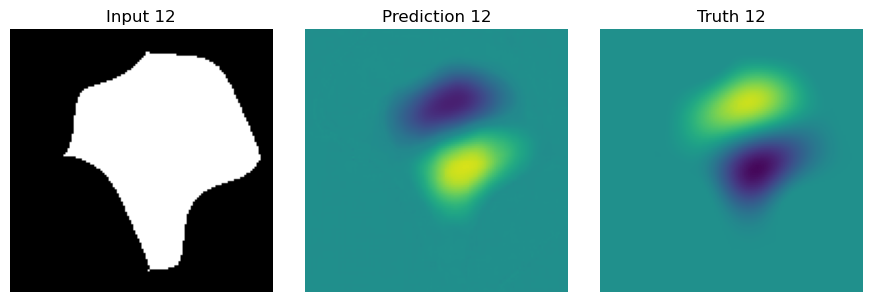

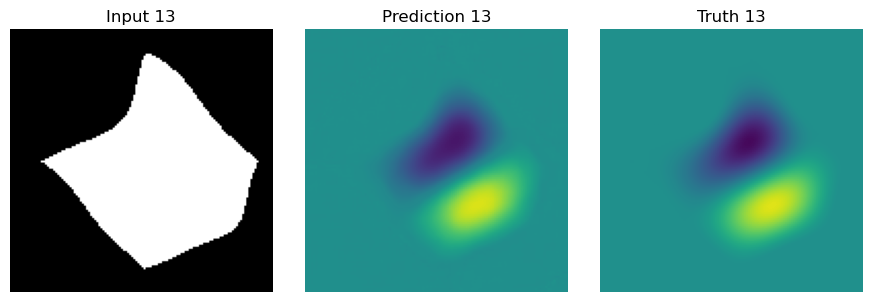

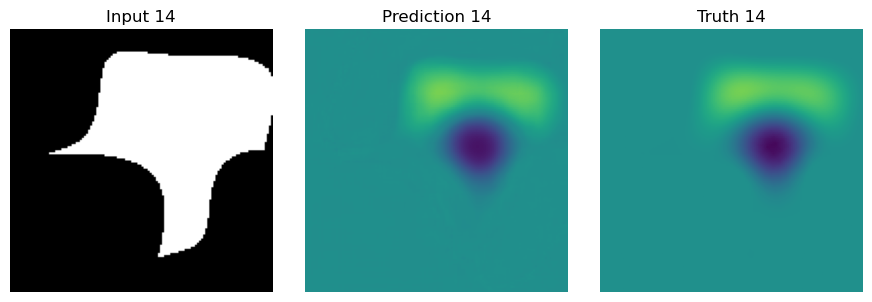

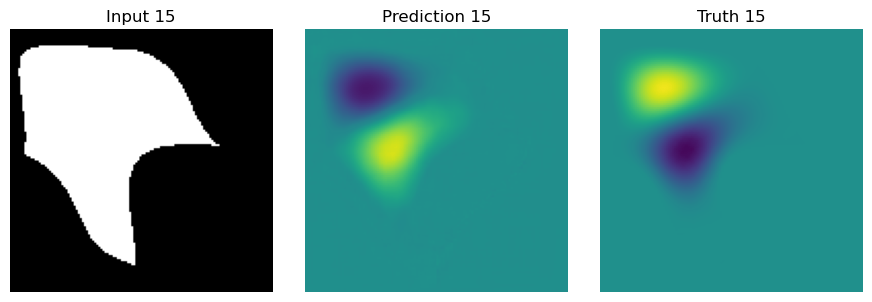

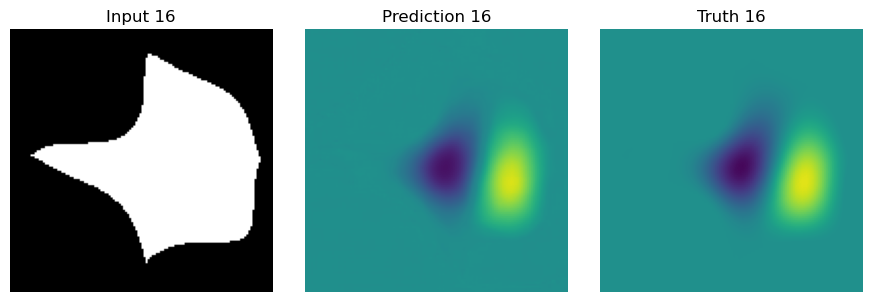

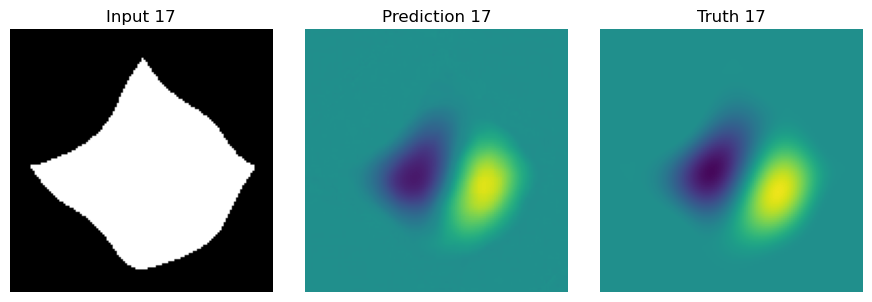

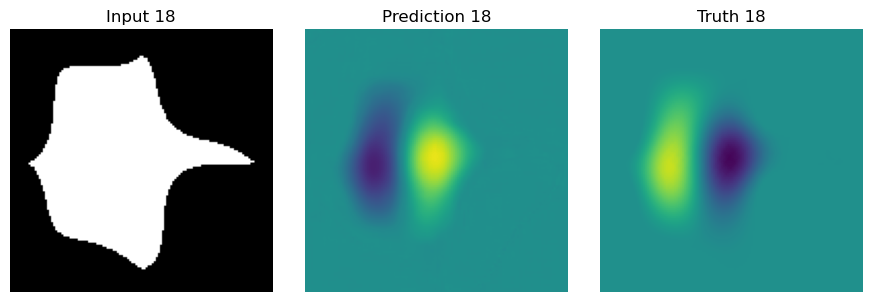

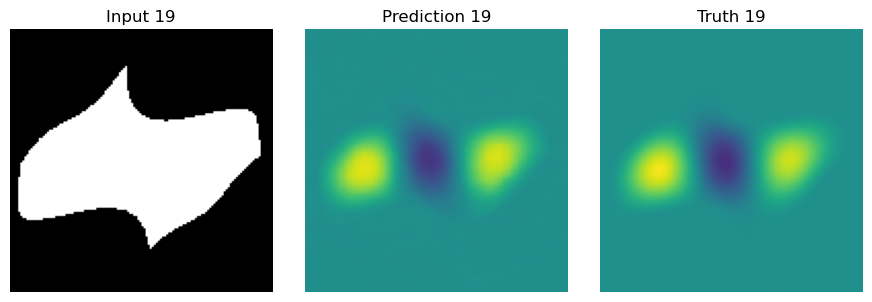

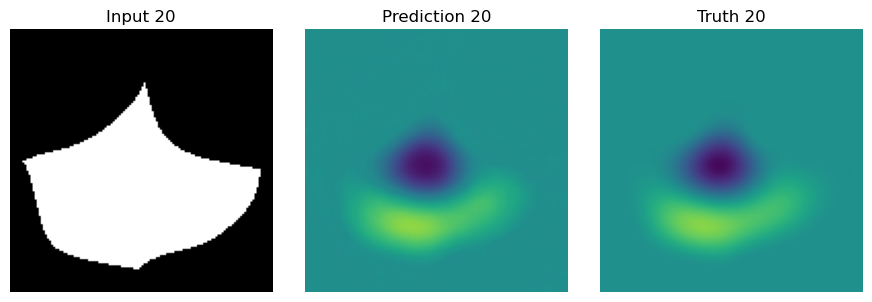

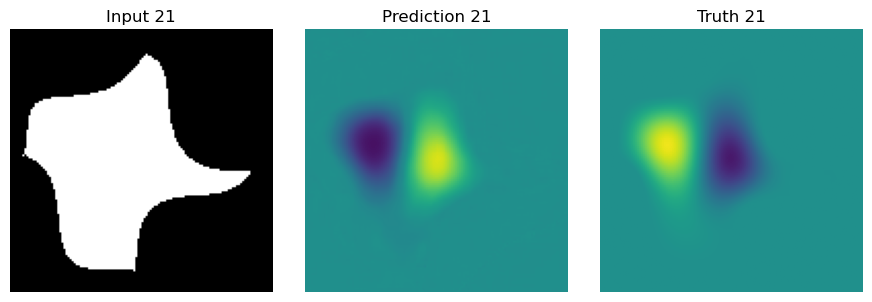

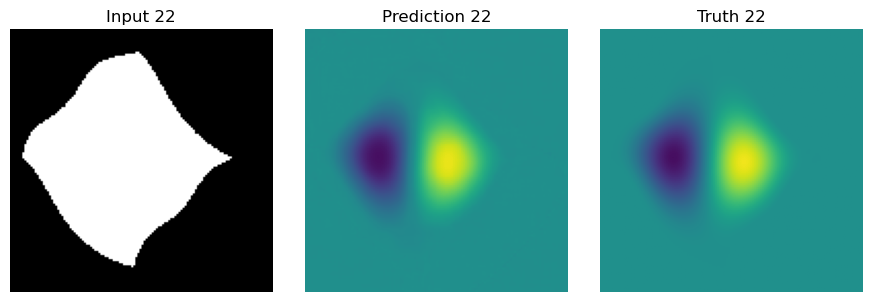

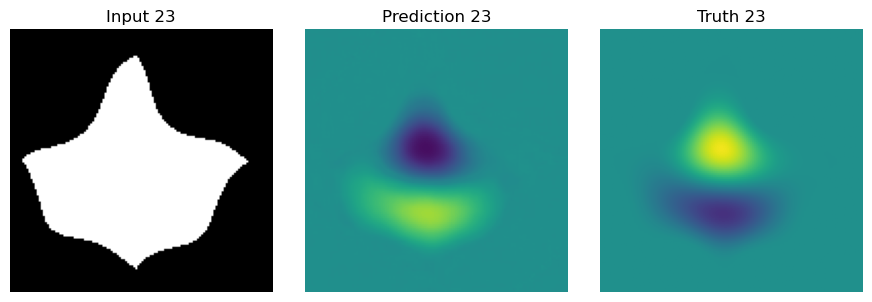

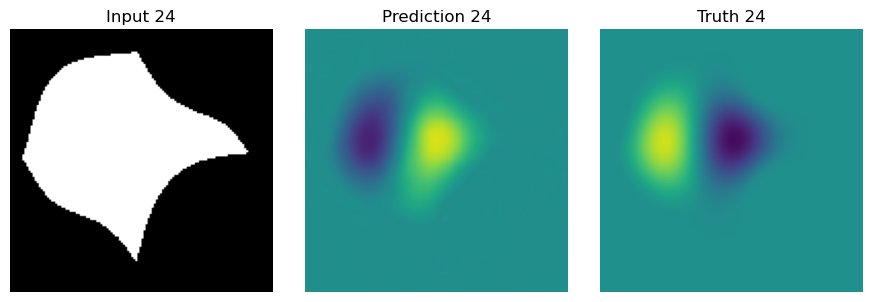

In [15]:
import matplotlib.pyplot as plt

# Function to display first 3 samples of input, prediction, and truth images side by side
def display_samples_line_by_line(input_images, prediction_images, truth_images, is_binary_input, is_binary_prediction, is_binary_truth):
    n = 24  # Display the first 3 samples

    for i in range(n):
        plt.figure(figsize=(9, 3))  # Adjust figure size for each row of images

        # Display input image
        plt.subplot(1, 3, 1)
        plt.imshow(input_images[i], cmap='gray' if is_binary_input else None)
        plt.title(f"Input {i+1}")
        plt.axis("off")

        # Display prediction image
        plt.subplot(1, 3, 2)
        plt.imshow(prediction_images[i], cmap='gray' if is_binary_prediction else None, vmax = 1, vmin = -1)
        plt.title(f"Prediction {i+1}")
        plt.axis("off")

        # Display truth image
        plt.subplot(1, 3, 3)
        plt.imshow(truth_images[i], cmap='gray' if is_binary_truth else None, vmax = 1, vmin = -1)
        plt.title(f"Truth {i+1}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

# Example usage
print("Comparison of First 3 Input, Prediction, and Truth Images:")
# Note: Ensure that `input_test`, `output_prediction`, and `output_test` are defined and loaded before calling this function
display_samples_line_by_line(input_test_test, output_prediction, output_test_test6, is_binary_input=True, is_binary_prediction=False, is_binary_truth=False)


In [16]:
# import matplotlib.pyplot as plt

# # Function to display images
# def display_images(images, title, is_binary):
#     plt.figure(figsize=(10, 10))
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         if is_binary:
#             plt.imshow(images[i])
#             plt.title(f"Binary {title} {i+1}")
#         else:
#             plt.imshow(images[i])
#             plt.title(f"Grayscale {title} {i+1}")
#         plt.axis("off")
#     plt.show()

# # Check and display input tests
# print("Input Images:")
# print("Shape:", input_images.shape)
# print("Data Type:", input_images.dtype)
# display_images(input_test, "Input Image", is_binary=True)

# # Check and display output predictions
# print("\nOutput preditions:")
# print("Shape:", output_images.shape)
# print("Data Type:", output_images.dtype)
# display_images(output_prediction, "Output Prediction", is_binary=False)

# # Check and display output tests
# print("\nOutput tests:")
# print("Shape:", output_images.shape)
# print("Data Type:", output_images.dtype)
# display_images(output_test, "Output Test", is_binary=False)

In [17]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]